In [1]:
import warnings
warnings.filterwarnings('ignore')
import squidpy as sq
import pandas as pd 
import anndata as ad
import scanpy as sc
from sklearn.metrics import adjusted_rand_score, normalized_mutual_info_score, fowlkes_mallows_score
import seaborn as sns
import matplotlib.pyplot as plt
import itertools
import numpy as np
import cellcharter as cc

In [3]:
adata = sc.read_h5ad("C://Users//laure//Desktop//github//Masterpraktikum//main_task//Version 2 Baysor filtered Zarr//Version_2_Baysor_merged_filtered_min_3_counts_genes.h5ad")

In [7]:
adata = adata[adata.obs["cell"] != "nan"]

In [8]:
adata.obs

cell            x            y          z  \
CR3bf7cc04d-1-0          CR3bf7cc04d-1  1563.050438  1250.939800  14.242585   
CR3bf7cc04d-10-0        CR3bf7cc04d-10  1468.793328  1380.050255  18.021484   
CR3bf7cc04d-100-0      CR3bf7cc04d-100  1040.260825  1883.537121  18.533628   
CR3bf7cc04d-1000-0    CR3bf7cc04d-1000  1340.364467  1979.224719  17.855925   
CR3bf7cc04d-10000-0  CR3bf7cc04d-10000  2318.181517  4586.971342  14.831104   
...                                ...          ...          ...        ...   
CR418b7a18c-9995-7    CR418b7a18c-9995  5316.202100  2180.841096  28.259183   
CR418b7a18c-9996-7    CR418b7a18c-9996  2700.238817  4808.539087  19.991219   
CR418b7a18c-9997-7    CR418b7a18c-9997  5628.818427  1885.564713  18.443586   
CR418b7a18c-9998-7    CR418b7a18c-9998  5182.152689  2328.003765  14.588119   
CR418b7a18c-9999-7    CR418b7a18c-9999  2753.741236  4750.801270  18.768131   

                     cluster  n_transcripts  density  elongation    area  \
CR3bf7cc04d-1-0          1.0            8.0  0.09741       3.305   82.13   
CR3bf7cc04d-10-0         1.0           29.0  0.12760       4.050  227.30   
CR3bf7cc04d-100-0        1.0           24.0  0.27880       2.233   86.09   
CR3bf7cc04d-1000-0       1.0           21.0  0.08340       2.166  251.80   
CR3bf7cc04d-10000-0      3.0           12.0  0.11880       3.345  101.00   
...                      ...            ...      ...         ...     ...   
CR418b7a18c-9995-7       1.0           23.0  0.12860       1.152  178.80   
CR418b7a18c-9996-7       1.0           94.0  0.25630       1.589  366.80   
CR418b7a18c-9997-7       1.0           15.0  0.15500       3.300   96.79   
CR418b7a18c-9998-7       2.0          242.0  0.44690       3.186  541.50   
CR418b7a18c-9999-7       2.0           33.0  0.33580       2.449   98.27   

                     avg_confidence  ...  sample  donor  condition n_counts  \
CR3bf7cc04d-1-0              0.9461  ...      1D      1   diseased      8.0   
CR3bf7cc04d-10-0             0.9919  ...      1D      1   diseased     17.0   
CR3bf7cc04d-100-0            0.9934  ...      1D      1   diseased     14.0   
CR3bf7cc04d-1000-0           0.9830  ...      1D      1   diseased     20.0   
CR3bf7cc04d-10000-0          0.9856  ...      1D      1   diseased      5.0   
...                             ...  ...     ...    ...        ...      ...   
CR418b7a18c-9995-7           0.9443  ...      4H      4    healthy     20.0   
CR418b7a18c-9996-7           0.9973  ...      4H      4    healthy     71.0   
CR418b7a18c-9997-7           0.9892  ...      4H      4    healthy     15.0   
CR418b7a18c-9998-7           0.9967  ...      4H      4    healthy    227.0   
CR418b7a18c-9999-7           0.9976  ...      4H      4    healthy     22.0   

                    leiden   cell_type  Baysor_circles  Noise batch n_genes  
CR3bf7cc04d-1-0          0  Fibroblast  Baysor_circles  False     0       3  
CR3bf7cc04d-10-0         2         SMC  Baysor_circles  False     0       9  
CR3bf7cc04d-100-0        2         SMC  Baysor_circles  False     0       9  
CR3bf7cc04d-1000-0       0  Fibroblast  Baysor_circles  False     0       7  
CR3bf7cc04d-10000-0      6  Macrophage  Baysor_circles  False     0       4  
...                    ...         ...             ...    ...   ...     ...  
CR418b7a18c-9995-7       2         SMC  Baysor_circles  False     7      14  
CR418b7a18c-9996-7       7         SMC  Baysor_circles  False     7      25  
CR418b7a18c-9997-7      15     unknown  Baysor_circles  False     7      10  
CR418b7a18c-9998-7      16          EC  Baysor_circles  False     7      73  
CR418b7a18c-9999-7       4     unknown  Baysor_circles  False     7      17  

[108589 rows x 24 columns]

In [84]:
sq.gr.spatial_neighbors(adata, coord_type="generic", delaunay=False, n_neighs=40)

In [31]:
sq.gr.calculate_niche(subset, flavor="cellcharter", n_components=5, adj_subsets=3)

In [29]:
subset = adata[adata.obs["sample"] == "1D"]

C:\Users\laure\Desktop\github\spatial_de\squidpy\src\squidpy\pl\_spatial_utils.py:981: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap', 'norm' will be ignored
  _cax = scatter(


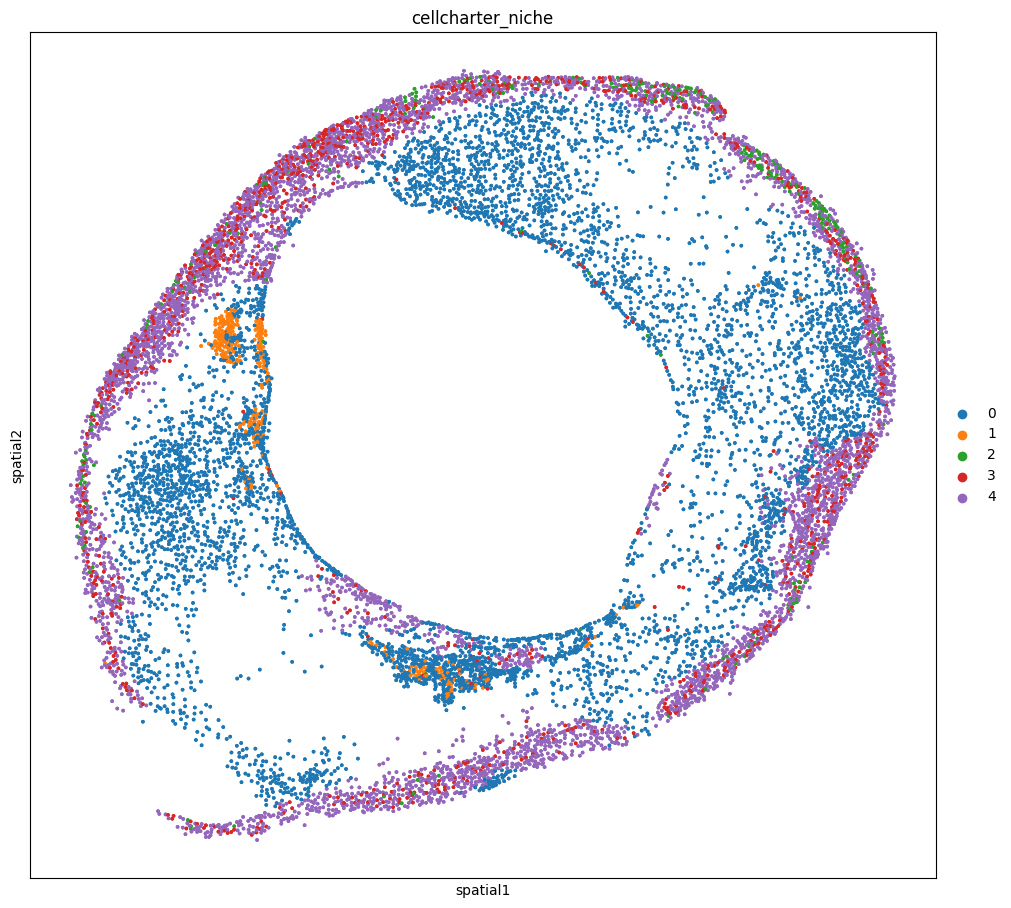

In [34]:
sq.pl.spatial_scatter(
    subset, color="cellcharter_niche", shape=None, figsize=(10, 10)
)

In [35]:
sq.gr.calculate_niche(subset, groups="plaque_region" ,flavor="utag", resolutions=[0.2], n_neighbors=15)

C:\Users\laure\Desktop\github\spatial_de\squidpy\src\squidpy\pl\_spatial_utils.py:981: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap', 'norm' will be ignored
  _cax = scatter(


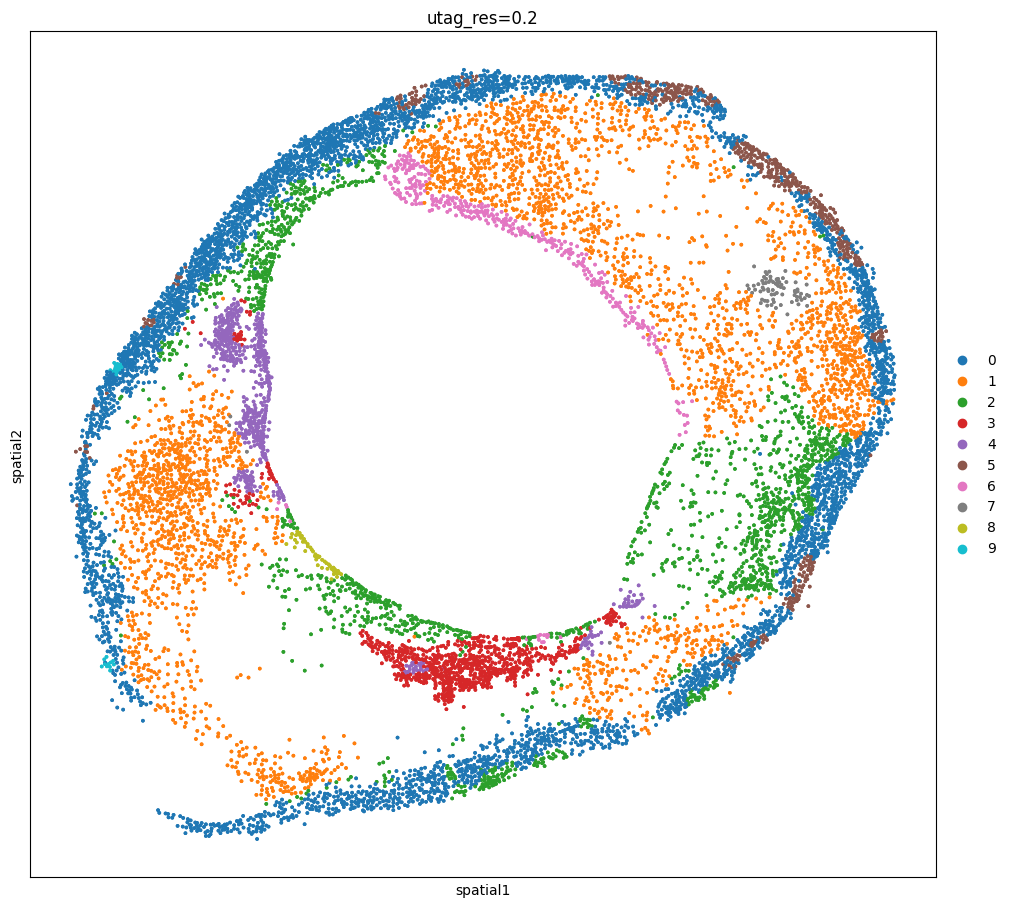

In [36]:
sq.pl.spatial_scatter(
    subset, color="utag_res=0.2", shape=None, figsize=(10, 10)
)

TODO:
- adjust for slides
- masking
- normalize properly in neighborhood profile

<h1> Niche calculations </h1>

load example data with cell type annotation:

In [2]:
adata = sq.datasets.seqfish()

Every niche method requires a spatial neighborhood graph, which is why `sq.gr.spatial_neighbors` needs to be run first.

In [4]:
sq.gr.spatial_neighbors(adata, coord_type="generic", delaunay=False, n_neighs=15)

Let's begin with the neighborhood profile clustering approach, where we mask low quality cells and avoid using Erythroid cells in our neighborhood profile:

In [39]:
mask = ~adata.obs['celltype_mapped_refined'].isin([
    'Low quality'
])

In [40]:
sq.gr.calculate_niche(adata, groups="celltype_mapped_refined", flavor="neighborhood", resolutions=[2.0], subset_groups=["Erythroid"], mask=mask, min_niche_size=100)

C:\Users\laure\Desktop\github\spatial_de\squidpy\src\squidpy\gr\_niche.py:243: ImplicitModificationWarning: Setting element `.obsp['spatial_connectivities']` of view, initializing view as actual.
  adata.obsp[spatial_connectivities_key] = adjacency_matrix.tocsr()


['Erythroid']
View of AnnData object with n_obs × n_vars = 17471 × 21
    var: 'mean', 'std'
calculating neighbors...


c:\Users\laure\anaconda3\envs\cluster_var\lib\site-packages\anndata\_core\aligned_df.py:67: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)
c:\Users\laure\anaconda3\envs\cluster_var\lib\site-packages\scipy\sparse\_index.py:145: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_arrayXarray(i, j, x)


finished calculating neighbors
starting clustering...
finished clustering at resolution 2.0


In [63]:
from squidpy.gr._niche import _calculate_neighborhood_profile

In [68]:
r, a = _calculate_neighborhood_profile(adata, subset_groups=None, groups="celltype_mapped_refined", spatial_connectivities_key="spatial_connectivities")

In [76]:
adata.n_obs

19416

In [82]:
a.sum(axis=1).max()

15

The niche result is now stored in `adata.obs`

In [7]:
adata.obs

Area         celltype_mapped_refined  \
embryo1_Pos0_cell10_z2   10400                     Low quality   
embryo1_Pos0_cell10_z5    2256          Lateral plate mesoderm   
embryo1_Pos0_cell100_z2   8144                       Erythroid   
embryo1_Pos0_cell100_z5   6592          Lateral plate mesoderm   
embryo1_Pos0_cell101_z2   8560                       Erythroid   
...                        ...                             ...   
embryo1_Pos28_cell97_z2   7552                     Spinal cord   
embryo1_Pos28_cell97_z5   3408                     Endothelium   
embryo1_Pos28_cell98_z2  12704                     Spinal cord   
embryo1_Pos28_cell98_z5  11376  Haematoendothelial progenitors   
embryo1_Pos28_cell99_z5   5392                     Spinal cord   

                        neighborhood_niche_res=2.0  
embryo1_Pos0_cell10_z2                 not_a_niche  
embryo1_Pos0_cell10_z5                          29  
embryo1_Pos0_cell100_z2                not_a_niche  
embryo1_Pos0_cell100_z5                         41  
embryo1_Pos0_cell101_z2                not_a_niche  
...                                            ...  
embryo1_Pos28_cell97_z2                          5  
embryo1_Pos28_cell97_z5                          5  
embryo1_Pos28_cell98_z2                         24  
embryo1_Pos28_cell98_z5                          5  
embryo1_Pos28_cell99_z5                          6  

[19416 rows x 3 columns]

Visualize the result by comparing it to the cell type annotation:

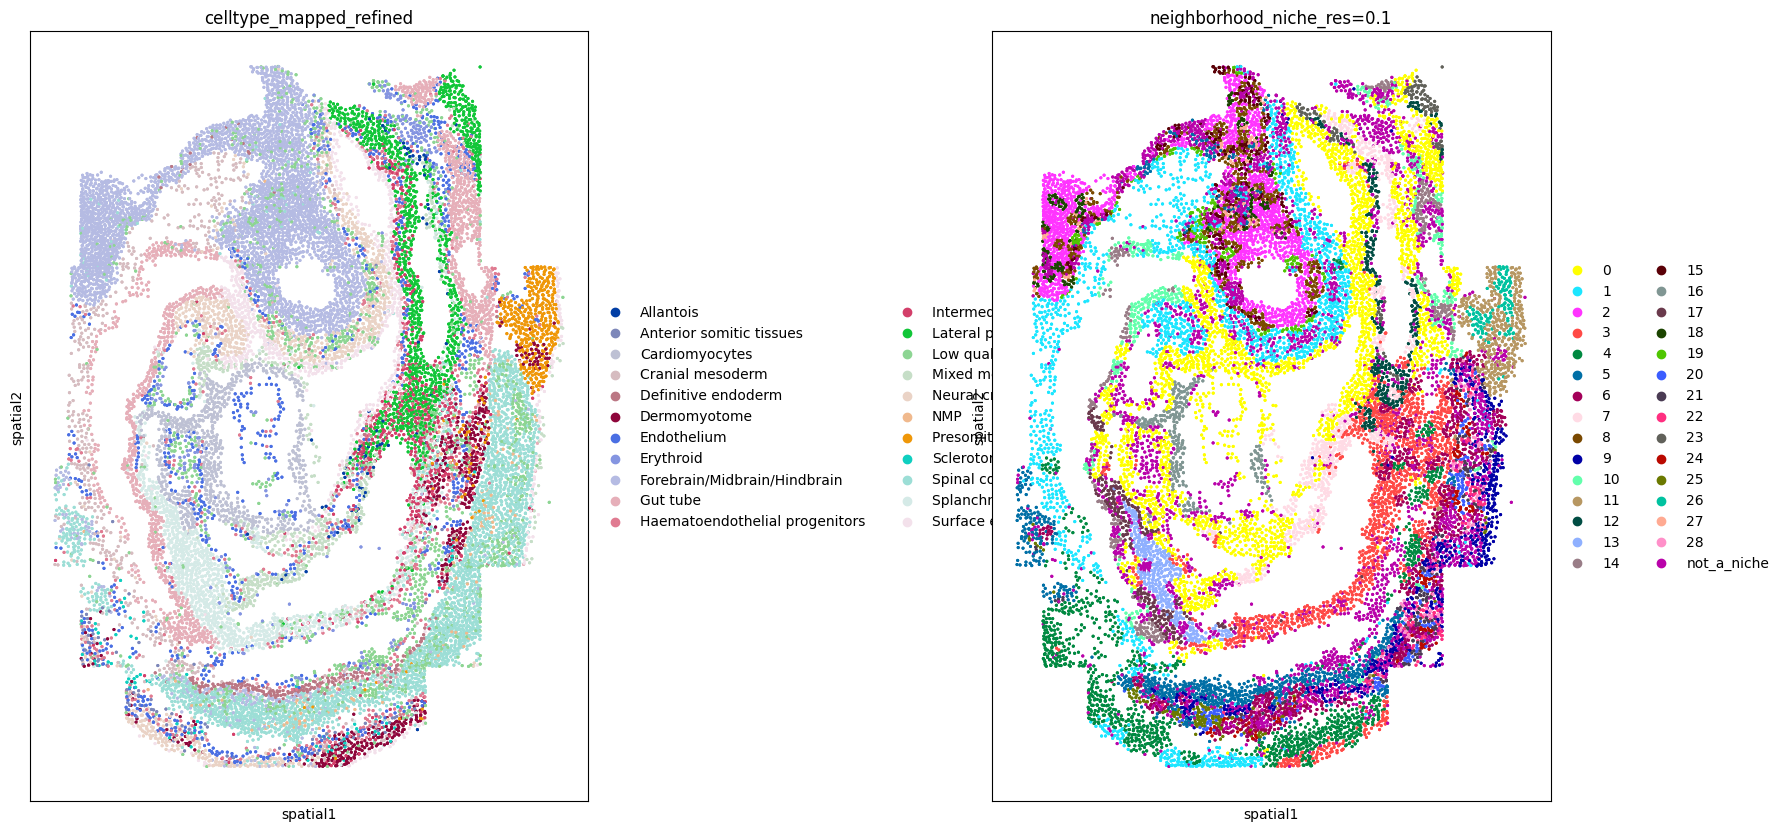

In [8]:
sq.pl.spatial_scatter(
    adata, color=["celltype_mapped_refined","neighborhood_niche_res=0.1"], shape=None, figsize=(10, 10)
)

NOTE: if we run the same method again (even with more resolutions), the function finishes much faster. Not sure if this is an error or something gets cached somewhere.

In [ ]:
sq.gr.calculate_niche(adata, groups="celltype_mapped_refined", flavor="neighborhood", resolutions=[1.0, 0.5, 0.1], subset_groups=["Erythroid"], mask=mask, min_niche_size=100)

The results however do differ as they should:

In [13]:
adata.obs

Area         celltype_mapped_refined  \
embryo1_Pos0_cell10_z2   10400                     Low quality   
embryo1_Pos0_cell10_z5    2256          Lateral plate mesoderm   
embryo1_Pos0_cell100_z2   8144                       Erythroid   
embryo1_Pos0_cell100_z5   6592          Lateral plate mesoderm   
embryo1_Pos0_cell101_z2   8560                       Erythroid   
...                        ...                             ...   
embryo1_Pos28_cell97_z2   7552                     Spinal cord   
embryo1_Pos28_cell97_z5   3408                     Endothelium   
embryo1_Pos28_cell98_z2  12704                     Spinal cord   
embryo1_Pos28_cell98_z5  11376  Haematoendothelial progenitors   
embryo1_Pos28_cell99_z5   5392                     Spinal cord   

                        neighborhood_niche_res=2.0 neighborhood_niche_res=1.0  \
embryo1_Pos0_cell10_z2                 not_a_niche                         23   
embryo1_Pos0_cell10_z5                          29                not_a_niche   
embryo1_Pos0_cell100_z2                not_a_niche                not_a_niche   
embryo1_Pos0_cell100_z5                         41                not_a_niche   
embryo1_Pos0_cell101_z2                not_a_niche                not_a_niche   
...                                            ...                        ...   
embryo1_Pos28_cell97_z2                          5                          5   
embryo1_Pos28_cell97_z5                          5                          5   
embryo1_Pos28_cell98_z2                         24                          6   
embryo1_Pos28_cell98_z5                          5                          5   
embryo1_Pos28_cell99_z5                          6                         13   

                        neighborhood_niche_res=0.5 neighborhood_niche_res=0.1  \
embryo1_Pos0_cell10_z2                          13                          8   
embryo1_Pos0_cell10_z5                 not_a_niche                not_a_niche   
embryo1_Pos0_cell100_z2                not_a_niche                not_a_niche   
embryo1_Pos0_cell100_z5                not_a_niche                not_a_niche   
embryo1_Pos0_cell101_z2                not_a_niche                not_a_niche   
...                                            ...                        ...   
embryo1_Pos28_cell97_z2                          5                          2   
embryo1_Pos28_cell97_z5                          5                          2   
embryo1_Pos28_cell98_z2                          6                          5   
embryo1_Pos28_cell98_z5                          5                          2   
embryo1_Pos28_cell99_z5                         12                          4   

                        neighborhood_niche_res=0.4 neighborhood_niche_res=0.75  
embryo1_Pos0_cell10_z2                           7                          20  
embryo1_Pos0_cell10_z5                           3                          12  
embryo1_Pos0_cell100_z2                         70                          84  
embryo1_Pos0_cell100_z5                          6                          51  
embryo1_Pos0_cell101_z2                         70                          84  
...                                            ...                         ...  
embryo1_Pos28_cell97_z2                          1                           5  
embryo1_Pos28_cell97_z5                          1                           5  
embryo1_Pos28_cell98_z2                          9                           7  
embryo1_Pos28_cell98_z5                          1                           5  
embryo1_Pos28_cell99_z5                          8                          14  

[19416 rows x 8 columns]

Changing the initial matrix thats used for neighborhood computation has the same effect, so it can't be that something is copied.

In [ ]:
sq.gr.calculate_niche(adata, groups="celltype_mapped_refined", flavor="neighborhood", resolutions=[0.75, 1.25], min_niche_size=100)

Could something be cached which makes subsequent runs faster? But the anndata object that is clustered does reset with every function call...

<h1> UTAG </h1>
Next we follow the UTAG approach, which involves the count matrix stored in adata.X.

In [14]:
sq.gr.calculate_niche(adata, groups="celltype_mapped_refined", flavor="utag", n_neighbors=15, resolutions=[0.1,0.5,1])

The new count matrix is stored in a different layer.

In [18]:
adata.obs

Area         celltype_mapped_refined  \
embryo1_Pos0_cell10_z2   10400                     Low quality   
embryo1_Pos0_cell10_z5    2256          Lateral plate mesoderm   
embryo1_Pos0_cell100_z2   8144                       Erythroid   
embryo1_Pos0_cell100_z5   6592          Lateral plate mesoderm   
embryo1_Pos0_cell101_z2   8560                       Erythroid   
...                        ...                             ...   
embryo1_Pos28_cell97_z2   7552                     Spinal cord   
embryo1_Pos28_cell97_z5   3408                     Endothelium   
embryo1_Pos28_cell98_z2  12704                     Spinal cord   
embryo1_Pos28_cell98_z5  11376  Haematoendothelial progenitors   
embryo1_Pos28_cell99_z5   5392                     Spinal cord   

                        neighborhood_niche_res=2.0 neighborhood_niche_res=1.0  \
embryo1_Pos0_cell10_z2                 not_a_niche                         23   
embryo1_Pos0_cell10_z5                          29                not_a_niche   
embryo1_Pos0_cell100_z2                not_a_niche                not_a_niche   
embryo1_Pos0_cell100_z5                         41                not_a_niche   
embryo1_Pos0_cell101_z2                not_a_niche                not_a_niche   
...                                            ...                        ...   
embryo1_Pos28_cell97_z2                          5                          5   
embryo1_Pos28_cell97_z5                          5                          5   
embryo1_Pos28_cell98_z2                         24                          6   
embryo1_Pos28_cell98_z5                          5                          5   
embryo1_Pos28_cell99_z5                          6                         13   

                        neighborhood_niche_res=0.5 neighborhood_niche_res=0.1  \
embryo1_Pos0_cell10_z2                          13                          8   
embryo1_Pos0_cell10_z5                 not_a_niche                not_a_niche   
embryo1_Pos0_cell100_z2                not_a_niche                not_a_niche   
embryo1_Pos0_cell100_z5                not_a_niche                not_a_niche   
embryo1_Pos0_cell101_z2                not_a_niche                not_a_niche   
...                                            ...                        ...   
embryo1_Pos28_cell97_z2                          5                          2   
embryo1_Pos28_cell97_z5                          5                          2   
embryo1_Pos28_cell98_z2                          6                          5   
embryo1_Pos28_cell98_z5                          5                          2   
embryo1_Pos28_cell99_z5                         12                          4   

                        neighborhood_niche_res=0.4  \
embryo1_Pos0_cell10_z2                           7   
embryo1_Pos0_cell10_z5                           3   
embryo1_Pos0_cell100_z2                         70   
embryo1_Pos0_cell100_z5                          6   
embryo1_Pos0_cell101_z2                         70   
...                                            ...   
embryo1_Pos28_cell97_z2                          1   
embryo1_Pos28_cell97_z5                          1   
embryo1_Pos28_cell98_z2                          9   
embryo1_Pos28_cell98_z5                          1   
embryo1_Pos28_cell99_z5                          8   

                        neighborhood_niche_res=0.75 utag_res=0.1 utag_res=0.5  \
embryo1_Pos0_cell10_z2                           20           11           34   
embryo1_Pos0_cell10_z5                           12           11           34   
embryo1_Pos0_cell100_z2                          84            5            2   
embryo1_Pos0_cell100_z5                          51           11           29   
embryo1_Pos0_cell101_z2                          84            5            2   
...                                             ...          ...          ...   
embryo1_Pos28_cell97_z2                           5            9       

Visualize the result:

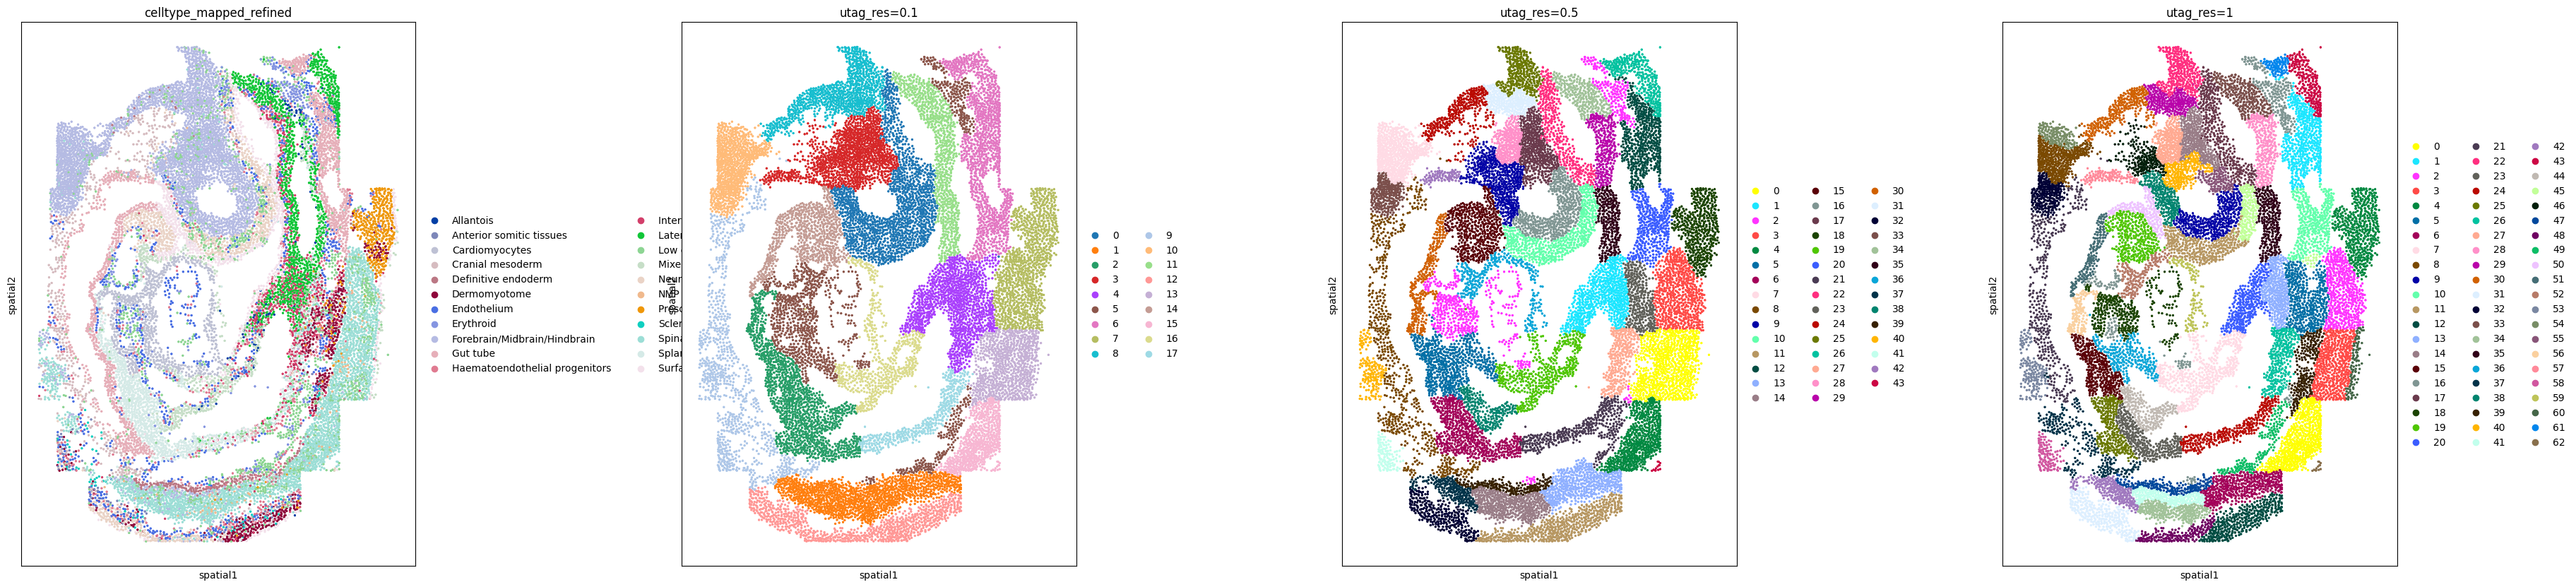

In [16]:
sq.pl.spatial_scatter(
    adata, color=["celltype_mapped_refined","utag_res=0.1","utag_res=0.5","utag_res=1"], shape=None, figsize=(10, 10)
)

For the Cellcharter approach, we can calculate the matrix which is later used for clustering. In their paper they used GMMs.

In [19]:
sq.gr.calculate_niche(adata, groups="celltype_mapped_refined", flavor="cellcharter", adj_subsets=3, n_components=5)

In [5]:
adata.obs

Area         celltype_mapped_refined
embryo1_Pos0_cell10_z2   10400                     Low quality
embryo1_Pos0_cell10_z5    2256          Lateral plate mesoderm
embryo1_Pos0_cell100_z2   8144                       Erythroid
embryo1_Pos0_cell100_z5   6592          Lateral plate mesoderm
embryo1_Pos0_cell101_z2   8560                       Erythroid
...                        ...                             ...
embryo1_Pos28_cell97_z2   7552                     Spinal cord
embryo1_Pos28_cell97_z5   3408                     Endothelium
embryo1_Pos28_cell98_z2  12704                     Spinal cord
embryo1_Pos28_cell98_z5  11376  Haematoendothelial progenitors
embryo1_Pos28_cell99_z5   5392                     Spinal cord

[19416 rows x 2 columns]

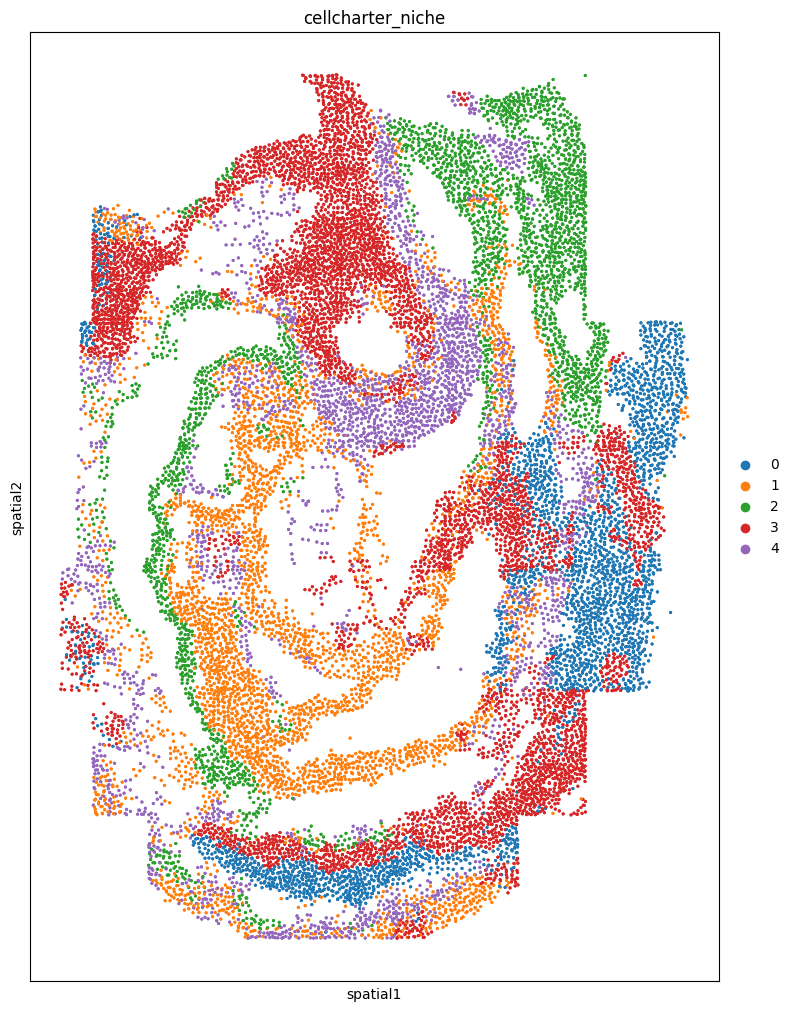

In [21]:
sq.pl.spatial_scatter(
    adata, color=["cellcharter_niche"], shape=None, figsize=(10, 10)
)

In [3]:
from squidpy.gr._niche import _aggregate, _hop, _normalize, _setdiag
from scipy.sparse import issparse
import scipy

In [4]:
def test_cellcharter_approach(adata_seqfish):
    """Check whether niche calculation using CellCharter approach works as intended."""
    N_NEIGHBORS = 20
    sq.gr.spatial_neighbors(adata_seqfish, coord_type="generic", delaunay=False, n_neighs=N_NEIGHBORS)
    sq.gr.calculate_niche(
        adata_seqfish, groups="celltype_mapped_refined", flavor="cellcharter", adj_subsets=3, n_components=5
    )
    niches = adata_seqfish.obs["cellcharter_niche"]

    assert niches.nunique() == 5
    assert niches.isna().sum() == 0

    adj = adata_seqfish.obsp["spatial_connectivities"]
    adj_hop = _setdiag(adj, value=0)
    assert adj_hop.shape == adj.shape
    assert issparse(adj_hop)
    assert isinstance(adj_hop, scipy.sparse.csr_matrix)

    adj_visited = _setdiag(adj.copy(), 1)  # Track visited neighbors
    adj_hop, adj_visited = _hop(adj_hop, adj, adj_visited)
    assert adj_hop.shape == adj.shape
    assert adj_hop.shape == adj_visited.shape

    assert np.array(np.sum(adj, axis=1)).squeeze().max() == N_NEIGHBORS
    adj_hop_norm = _normalize(adj_hop)
    assert adj_hop_norm.shape == adj.shape

    mean_aggr_matrix = _aggregate(adata_seqfish, adj_hop_norm, "mean")
    assert mean_aggr_matrix.shape == adata_seqfish.X.shape
    var_aggr_matrix = _aggregate(adata_seqfish, adj_hop_norm, "variance")
    assert var_aggr_matrix.shape == adata_seqfish.X.shape

In [16]:
adj = adata.obsp["spatial_connectivities"]
arr = adata.X.toarray()
mean = adj @ arr
mean_squared = adj @ (arr * arr)

In [19]:
mean_squared - mean * mean

array([[  -20.,   -34.,  -128., ...,   -88.,  -464.,   -12.],
       [  -20.,     0.,   -34., ...,  -310.,  -906.,     0.],
       [    0., -1290.,   -18., ...,   -20.,   -40.,   -26.],
       ...,
       [  -66.,   -52.,   -10., ...,  -818.,  -106.,    -6.],
       [   -2.,   -12.,   -12., ...,  -252.,  -174.,   -18.],
       [   -2.,    -2.,   -12., ...,  -266.,  -128.,    -2.]])

In [5]:
test_cellcharter_approach(adata)

Experimental

In [ ]:
def pairwise_niche_comparison(
    adata: AnnData,
    library_key: str,
) -> pd.DataFrame:
    """Do a simple pairwise DE test on the 99th percentile of each gene for each niche.
    Can be used to plot heatmap showing similar (large p-value) or different (small p-value) niches.
    For validating niche results, the niche pairs that are similar in expression are the ones of interest because
    it could hint at niches not being well defined in those cases."""
    niches = adata.obs[library_key].unique().tolist()
    niche_dict = {}
    # for each niche, calculate the 99th percentile of each gene
    for niche in adata.obs[library_key].unique():
        niche_adata = adata[adata.obs[library_key] == niche]
        n_cols = niche_adata.X.shape[1]
        arr = np.ones(n_cols)
        for i in range(n_cols):
            col_data = niche_adata.X.getcol(i).data
            percentile_99 = np.percentile(col_data, 99)
            arr[i] = percentile_99
        niche_dict[niche] = arr
    # create 99th percentile count x niche matrix
    var_by_niche = pd.DataFrame(niche_dict)
    result = pd.DataFrame(index=niches, columns=niches, data=None, dtype=float)
    # construct all pairs (unordered and with pairs of the same niche)
    combinations = list(itertools.combinations_with_replacement(niches, 2))
    # create a p-value matrix for all niche pairs
    for pair in combinations:
        p_val = ranksums(var_by_niche[pair[0]], var_by_niche[pair[1]], alternative="two-sided")[1]
        result.at[pair[0], pair[1]] = p_val
        result.at[pair[1], pair[0]] = p_val
    return result

In [ ]:
def _compare_niche_definitions(adata: AnnData, niche_definitions: list[str]) -> pd.DataFrame:
    """Given different clustering results, compare them using different scores."""

    result = pd.DataFrame(index=niche_definitions, columns=niche_definitions, data=None, dtype=float)
    combinations = list(itertools.combinations_with_replacement(niche_definitions, 2))
    scores = {"ARI:": adjusted_rand_score, "NMI": normalized_mutual_info_score, "FMI": fowlkes_mallows_score}

    # for each score, apply it on all pairs of niche definitions
    for score_name, score_func in scores.items():
        for pair in combinations:
            score = score_func(adata.obs[pair[0]], adata.obs[pair[1]])
            result.at[pair[0], pair[1]] = score
            result.at[pair[1], pair[0]] = score
        adata.uns[f"niche_definition_comparison_{score_name}"] = result

In [ ]:
def _get_subset_indices(df: pd.DataFrame, column: str) -> pd.Series:
    return df.groupby(column).apply(lambda x: set(x.index))


def _find_best_match(subset: set[str], other_subsets: dict[str, set[str]], exclude: set[str]) -> tuple[str, float]:
    """Find best matching niche pair between two sets of niche definitions.
    Niches which have already been matched, are excluded from further comparisons."""

    best_match = ""
    max_overlap = 0.0
    for other_subset, indices in other_subsets.items():
        if other_subset in exclude:
            continue  # Skip excluded matches
        overlap = len(subset & indices) / len(subset | indices)  # jaccard index
        if overlap > max_overlap:
            max_overlap = overlap
            best_match = other_subset
    return (best_match, max_overlap)

def _get_initial_niches(niche_definitions: list[dict[str, set[str]]]) -> dict[str, set[str]]:
    """Select the niche definition with the fewest amount of unique niches."""

    min_niches = {}
    min_niche_count = float("inf")

    for niches in niche_definitions:
        niche_count = len(niches)

        if niche_count < min_niche_count:
            min_niches = niches
            min_niche_count = niche_count

    return min_niches


def _filter_overlap(initial_consensus: dict[str, set[str]]) -> dict[str, str]:
    """ "Remove labels which are present in multiple niches. Labels are always kept in the niche with higher average jaccard index."""

    filtered_consensus = {}
    processed_elements: set[str] = set()

    for key, values in initial_consensus.items():
        unique_values = values - processed_elements  # Remove already processed elements
        for value in unique_values:
            filtered_consensus[value] = key  # Swap key and value to make further processing easier
        processed_elements.update(unique_values)  # Mark value as processed

    return filtered_consensus


def build_consensus_niche(adata: AnnData, niche_definitions: list[str], merge: str = "union") -> AnnData:
    """Given multiple niche definitions, construct a consensus niche using set matching.
    Each niche definition is treated as a set of subsets. For each subset in set A we look for the best matching subset in set B.
    Once a match has been found, these sets are merged either by union or intersection. This merged set is then used as the new set A for the next iteration.
    The final consensus niches are filtered for overlapping labels and stored as a new column in `adata.obs`.
    Parameters
    ----------
    %(adata)s
    niche_definitions
        Name of columns in `adata.obs` where previously calculated niches are stored.
    merge
        - `{c.union.s!r}`- merge niche matches via union join.
        - `{c.intersection.s!r}` - merge niche matches by their intersection.
    """

    list_of_sets = []
    for definition in niche_definitions:
        list_of_sets.append(_get_subset_indices(adata.obs, definition))

    union_of_matches = _get_initial_niches(list_of_sets)

    avg_jaccard = np.zeros(len(union_of_matches))  # the jaccard index is tracked to order the consensus niches later on

    for set_of_sets in range(len(list_of_sets) - 1):
        current_matches = {}
        used_matches: set[str] = set()
        matches_A_B = {
            subset: _find_best_match(indices, list_of_sets[set_of_sets + 1], exclude=used_matches)
            for subset, indices in union_of_matches.items()
        }
        ranked_matches = sorted(matches_A_B.items(), key=lambda x: x[1][1], reverse=True)
        for subset_A, (match, jaccard_index) in ranked_matches:
            if match not in used_matches:
                current_matches[subset_A] = (match, jaccard_index)
                used_matches.add(match)
            else:
                new_match, new_jaccard = _find_best_match(
                    union_of_matches[subset_A], list_of_sets[set_of_sets + 1], exclude=used_matches
                )
                if new_match:
                    current_matches[subset_A] = (new_match, new_jaccard)
                    used_matches.add(new_match)

        jaccard = np.asarray([jaccard_index for _, (_, jaccard_index) in current_matches.items()])
        avg_jaccard = (avg_jaccard + jaccard) / (set_of_sets + 1)

        if merge == "union":
            consensus = {
                subset_A: union_of_matches[subset_A] | list_of_sets[set_of_sets + 1][match]
                for subset_A, (match, _) in current_matches.items()
            }
        if merge == "intersection":
            consensus = {
                subset_A: union_of_matches[subset_A] & list_of_sets[set_of_sets + 1][match]
                for subset_A, (match, _) in current_matches.items()
            }

    niche_categories = list(consensus.keys())
    consensus_by_jaccard = dict(zip(niche_categories, avg_jaccard))

    sorted_by_jaccard = dict(
        sorted(consensus_by_jaccard.items(), key=lambda item: item[1], reverse=True),
    )
    sorted_consensus = {key: consensus[key] for key in sorted_by_jaccard}
    filtered_consensus = _filter_overlap(sorted_consensus)

    adata.obs["consensus_niche"] = adata.obs.index.map(filtered_consensus).fillna("None")